In [2]:
from random import random, seed
import random as rand
import matplotlib.pyplot as plt
import math

In [3]:
def graph(func, test_count=1_000_000, with_stabil=False):
    rand.seed(1223)
    results = [0]

    for _ in range(test_count):
        if hasattr(res := func(), '__iter__'):
            res, *dat = res
        results.append(res + results[-1])

    results = [el / (n+1) for n, el in enumerate(results[1:])]

    mean = sum(results)/test_count
    s = results[test_count//50:]
    k = max(s) - min(s)
    plt.ylim(mean-k, mean+k)

    real_mean = sum(results[test_count//20:]) / (test_count//20*19)

    plt.plot(results)
    plt.plot([0, test_count], [real_mean, real_mean])

    

    return real_mean

In [388]:
from scipy.stats import *
# создаем равномерное (непрерывное) распределение на отрезке
U1 = uniform()
U2 = uniform()
N = 1500000
count = 0
for x, y in zip(U1.rvs(size=N), U2.rvs(size=N)):
  if abs(x-y) <= 10/60:
    count += 1
  else:
    continue
pstat = count/N
pstat


0.30573133333333335

---
## 4.2
Иван и Пётр договорились о встрече в определённом месте между 11 и 12 часами. Каждый приходит и ждёт другого до истечения часа, но не более 15 минут.


0.43649885481523865

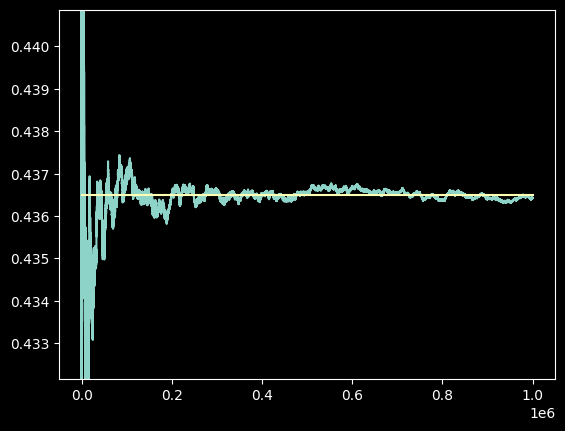

In [191]:
# A - Встреча состоялась
def make_them():
    x = rand.uniform(0, 60)
    y = rand.uniform(0, 60)
    return abs(x-y) <= 15
graph(make_them)

0.5635011451847717

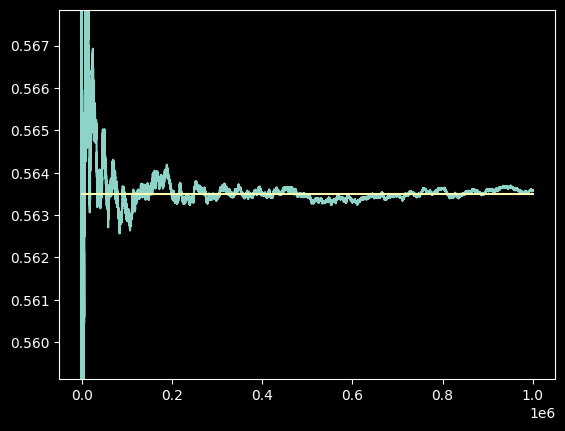

In [192]:
# B - Встреча не состоялась
def make_them():
    x = rand.uniform(0, 60)
    y = rand.uniform(0, 60)
    return abs(x-y) > 15


graph(make_them)


0.21858229063278886

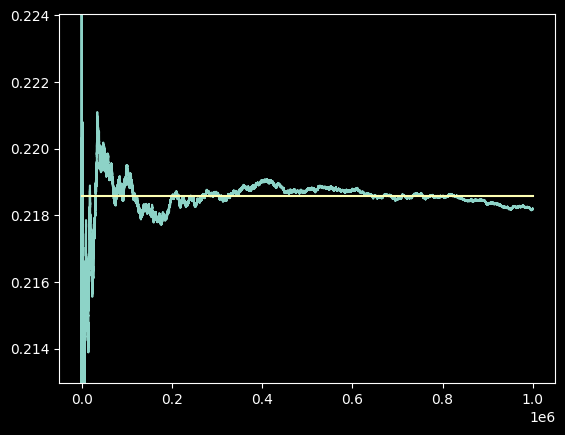

In [193]:
# C - Ивану не пришлось ждать Петра
def make_them():
    i = rand.uniform(0, 60)
    p = rand.uniform(0, 60)
    return p >= i and p - i <= 15

graph(make_them)

0.24900599102269316

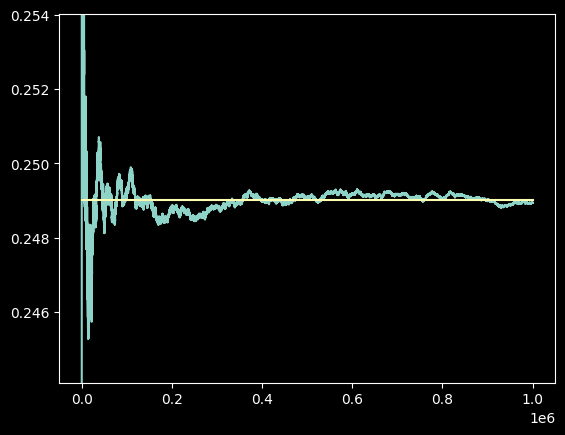

In [194]:
# D - Встреча состоялась после 11:30
def make_them():
    i = rand.uniform(0, 60)
    p = rand.uniform(0, 60)
    return abs(p-i) <= 15 and max([p, i]) > 30


graph(make_them)


0.2820695831674413

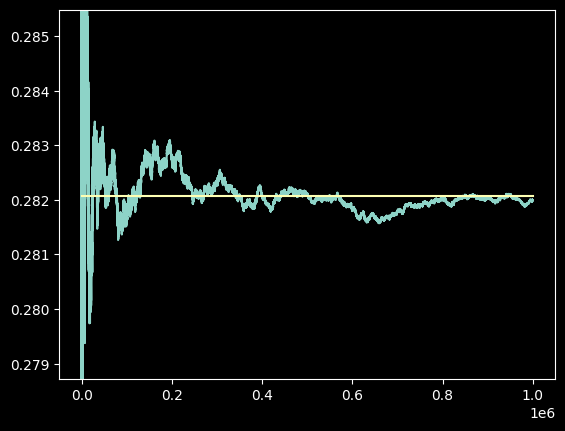

In [197]:
# E - Иван опоздал на встречу
def make_them():
    i = rand.uniform(0, 60)
    p = rand.uniform(0, 60)
    return abs(p-i) > 15 and i > p


graph(make_them)


0.04162897155089652

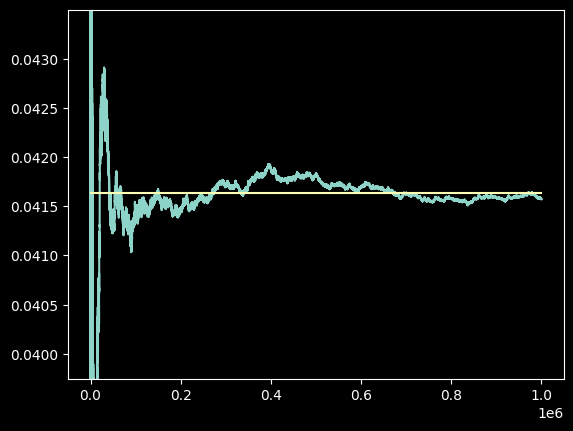

In [196]:
# F - Встреча состоялась, когда до истечения часа состоялось меньше 5 минут
def make_them():
    i = rand.uniform(0, 60)
    p = rand.uniform(0, 60)
    return abs(p-i) <= 15 and max([p, i]) > 55


graph(make_them)

---
## 4.3
На отрезке [a, b], лежащем на числовой оси, наудачу выбирается первая точка с координатой x, после чего на отрезке [а, x] наудачу выбирается вторая точка с координатой y. Найдите вероятности следующих событий

In [9]:
def get_dot(a, b):
    x = rand.uniform(a, b)
    y = rand.uniform(a, x)
    return x, y


0.3066568229712595

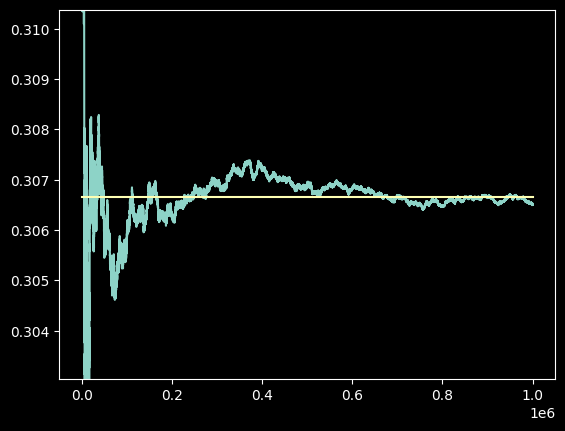

In [267]:
# А — вторая точка ближе к b, чем первая к а
def A(a=0, b=10):
    x, y = get_dot(a, b)
    return b - x < y - a
graph(A)

    

0.8466532517797223

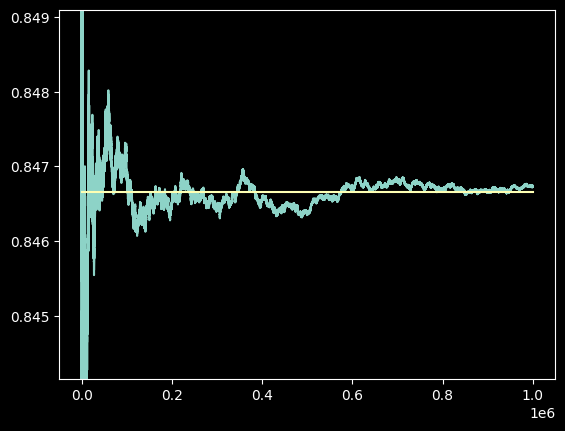

In [273]:
# В — расстояние между точками x и y меньше половины длины отрезка
def B(a=0, b=10):
    x, y = get_dot(a, b)
    return x - y < (b-a)/2


graph(B)

0.693071264925772

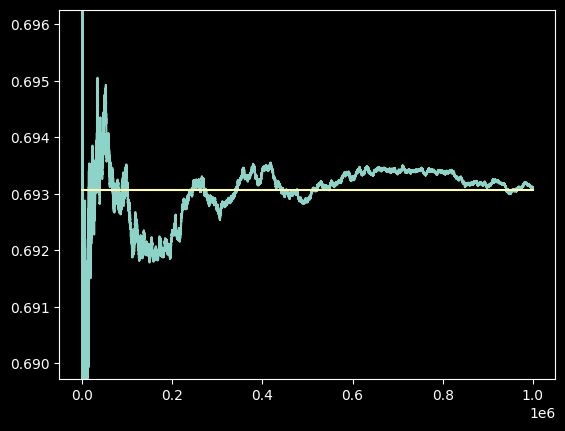

In [274]:
# С — первая точка ближе ко второй, чем к точке b
def C(a=0, b=10):
    x, y = get_dot(a, b)
    return x - y < b-x

graph(C)

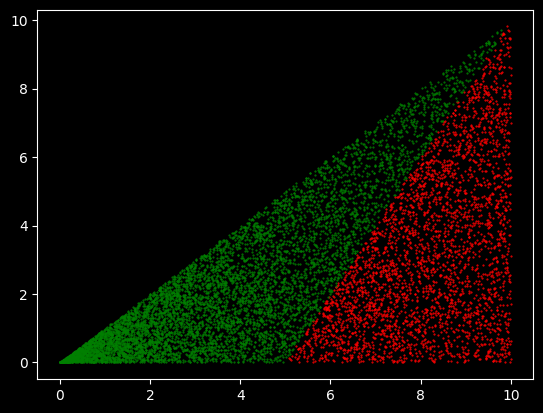

0.6893

In [10]:
def uni_graph(func, test_count=10_000):
  c = 0
  for _ in range(test_count):
      res, x, y = func()
      plt.plot(x, y, marker='.', markersize=1, color='rg'[res])

      if res:
          c += 1

  plt.show()
  return c / test_count


def C2(a=0, b=10):
    x, y = get_dot(a, b)
    return x - y < b - x, x, y

uni_graph(C2)


Найти соответствующие статистические вероятности и показать статистическую устойчивость вероятности в зависимости от числа экспериментов N

---
## 4.4
Найти вероятность того, что сумма двух случайных положительных чисел x и у (x < 1, у < 1) не превзойдёт 1, а их произведение будет не меньше 2

0.012386238050613736

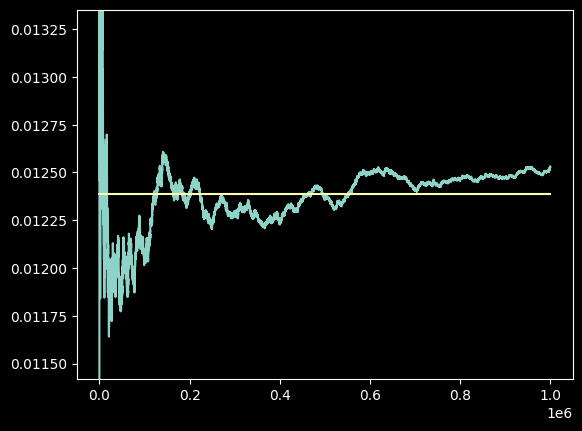

In [199]:
def f():
    a, b = random(), random()
    return a + b <= 1 and a*b >= 2/9
graph(f)

---
## 4.5
На отрезке единичной длины наудачу выбираются две точки. Какова вероятность того, что из трех отрезков, на которые делится исходный отрезок выбранными точками, можно составить треугольник?

0.7494995432484404

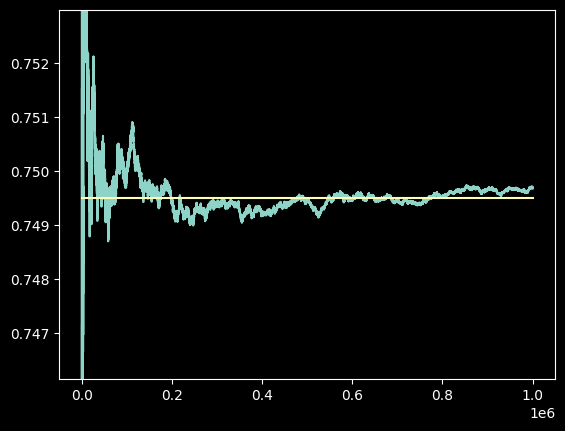

In [226]:
def is_triangle():
    a = b = 0
    while a == b:
        a, b = sorted([random(), random()])
    b, c = b-a, 1-b
    return a + b > c


graph(is_triangle)
    


---
## 4.7
Отрезок [0; 1] случайным образом делится на З части. Найти вероятность того, что из полученных отрезков можно сложить треугольник и этот треугольник будет остроугольным. Найти соответствующую статистическую вероятность и показать статистическую устойчивость вероятности в зависимости от числа экспериментов М. Найти аналитическое решение.


0.25019137164296273

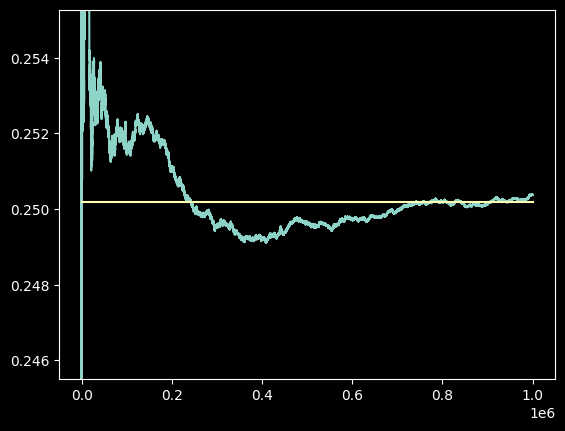

In [15]:
def is_triangle2():
    a = b = 0
    while a == b:
        a, b = sorted([random(), random()])
    x, y = a, b
    b, c = b-a, 1-b
    a, b, c = sorted([a, b, c])
    if a + b <= c:
        return False
    # Проверка на то, что наибольший угол острый, по теореме косинусов
    angle = (c**2 - a**2 - b**2)/(2*b*c)
    return -1 < angle < 1, x, y


graph(is_triangle2)


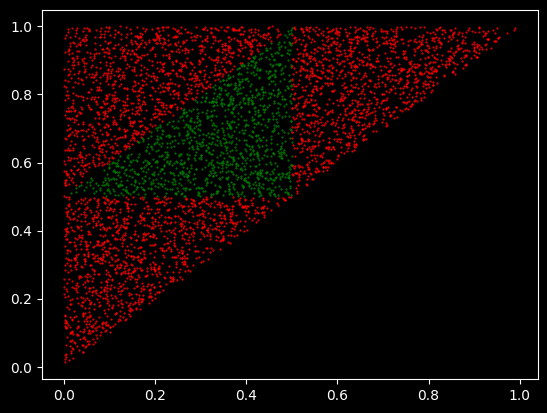

0.2504

In [22]:
def is_triangle2():
    a = b = 0
    while a == b:
        a, b = sorted([random(), random()])
    x, y = a, b
    b, c = b-a, 1-b
    a, b, c = sorted([a, b, c])
    if a + b <= c:
        return False, x, y
    # Проверка на то, что наибольший угол острый, по теореме косинусов
    angle = (c**2 - a**2 - b**2)/(2*b*c)
    return -1 < angle < 1, x, y


uni_graph(is_triangle2)
# is_triangle2()

---
## 4.8
В круге радиуса 1 наудачу выбирается отрезок. Найти вероятность того, что длина этого отрезка будет меньше радиуса круга.


0.5870584778367288

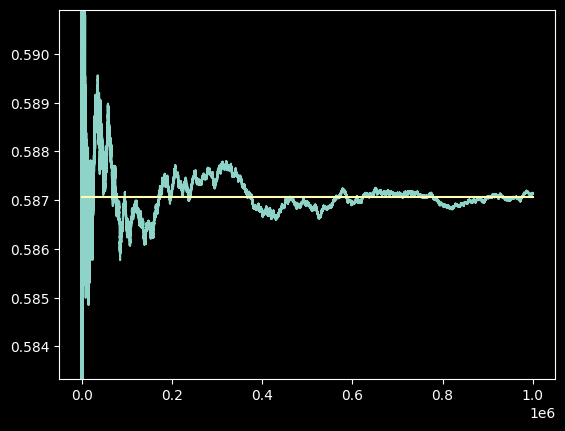

In [276]:
# 4.8
def get_rand_cords(mi, ma):
    return rand.uniform(mi, ma), rand.uniform(mi, ma)


def cirle_validate(coords, r=1):
    x, y = coords
    return x**2 + y**2 < r**2

def calc_len(x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def get_segment(r=1):
    while not cirle_validate(point1 := get_rand_cords(-1, 1)):
        ...
    while not cirle_validate(point2 := get_rand_cords(-1, 1)):
        ...
    return calc_len(*point1, *point2) < r

graph(get_segment)

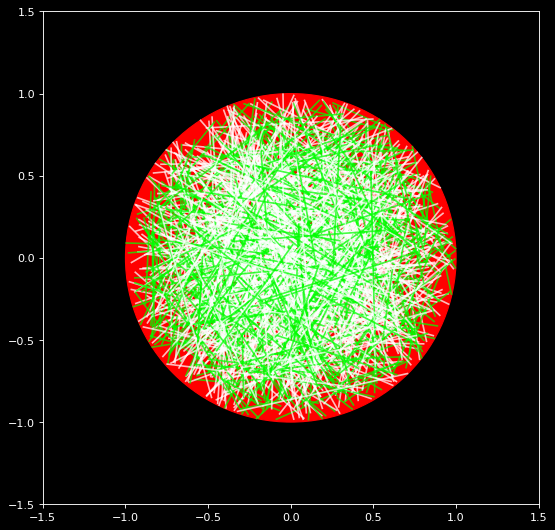

In [306]:
ccl = plt.Circle((0, 0), 1, color='r')
plt.figure(figsize=(8, 8), dpi=80)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().add_patch(ccl)
for i in range(1000):
    while not cirle_validate(point1 := get_rand_cords(-1, 1)):
        ...
    while not cirle_validate(point2 := get_rand_cords(-1, 1)):
        ...
    tr = calc_len(*point1, *point2) < 1
    plt.plot(*zip(point1, point2), color=('#ffffffbb', '#00ff00bb')[tr])
# plt.show()

0.7768687009318607

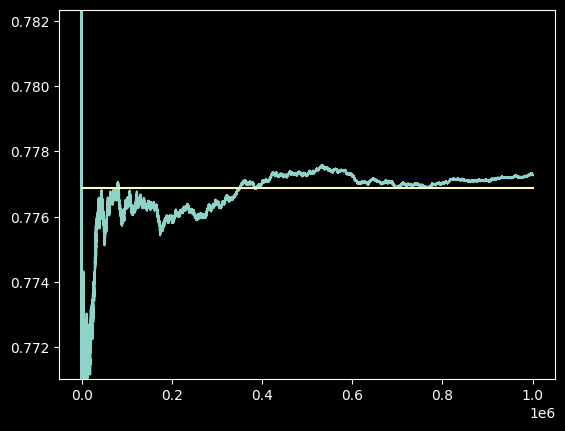

In [301]:
from random import choice
import numpy as np
cnt = 0
x = []
y = []
angles = np.linspace(0, np.pi, 10000)
rads = np.linspace(0, 1, 10000)

def test():
    rand_angle_1 = rand.uniform(0, 2*np.pi)
    rand_rad_1 = random()
    rand_angle_2 = rand.uniform(0, 2*np.pi)
    rand_rad_2 = random()
    
    # return (rand_rad_1**2 + rand_rad_2**2-2*rand_rad_1*rand_rad_2*np.cos(rand_angle_2-rand_angle_1))**(1/2) < 1
graph(test)
# test()


0.5870584778367288

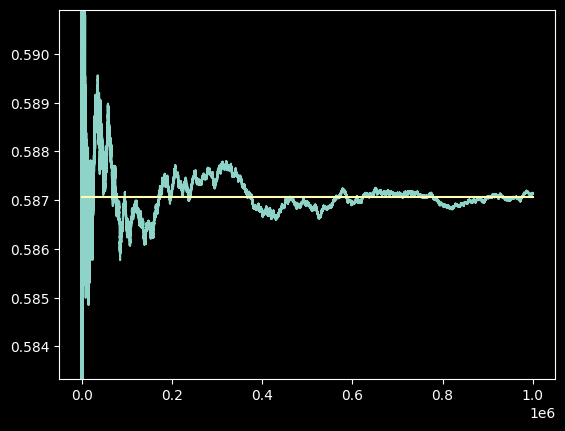

In [ ]:
graph(get_segment)


In [11]:
def uni_graph(func, test_count=5000):
  c = 0
  for _ in range(test_count):
      res, x, y = func()
      plt.plot(x, y, marker='.', markersize=1, color='rg'[res])

      if res:
          c += 1

  plt.show()
  return c / test_count


def generate_point(a, b):
    x = rand.uniform(a, b)
    y = rand.uniform(a, b)
    if y > x:
      x, y = y, x
    return x, y

# Случай А: Вторая точка ближе к b, чем первая к а


def b_closer_a(a=0, b=10):
    x, y = generate_point(a, b)
    return b - x < y - a, x, y


uni_graph(b_closer_a)

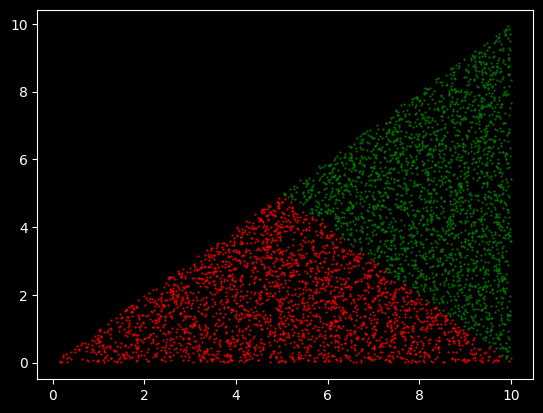

0.4926

In [12]:


def generate_point(a, b):
    x = rand.uniform(a, b)
    y = rand.uniform(a, b)
    if y > x:
      x, y = y, x
    return x, y

# Случай А: Вторая точка ближе к b, чем первая к а


def b_closer_a(a=0, b=10):
    x, y = generate_point(a, b)
    return b - x < y - a, x, y


uni_graph(b_closer_a)

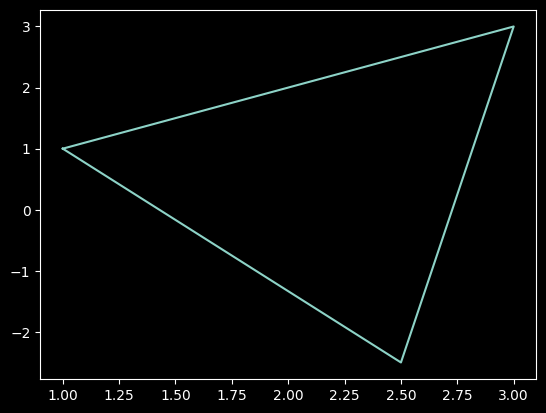

In [29]:
def get_mir(x, y, X, Y):
    dx, dy = min(zip(X, Y), key=lambda t: (t[0]**2 + t[1]**2)**.5)
    return 2*dx-x, 2*dy-y
    

def raspr(X, Y, in_figure):

    while not in_figure(x, y):
        x, y = get_mir(x, y, X, Y)
    return x, y
        

a = (1, 1)
b = (3, 3)
c = (2.5, -2.5)

def get_triangle()

plt.plot(*zip(a, b, c, a))
for i in range(100):
    plt.plot(raspr())
plt.show()